<a href="https://colab.research.google.com/github/WolfyIt/Avance-2-Evidencia-1/blob/main/Kmeans_pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd

# Montar Google Drive
drive.mount("/content/drive/")

# Cargar el dataset
df = pd.read_csv("/content/drive/MyDrive/DataSets/Ejercicios/Practica 2/pokemon.csv")

# Verificar las primeras filas del DataFrame
print(df.head())


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
   pokemon_id pokemon_name  base_attack  base_defense  base_stamina  \
0           1    Bulbasaur          118           111           128   
1           2      Ivysaur          151           143           155   
2           3     Venusaur          198           189           190   
3           4   Charmander          116            93           118   
4           5   Charmeleon          158           126           151   

                  type    rarity  \
0  ['Grass', 'Poison']  Standard   
1  ['Grass', 'Poison']  Standard   
2  ['Grass', 'Poison']  Standard   
3             ['Fire']  Standard   
4             ['Fire']  Standard   

                                     charged_moves  \
0       ['Sludge Bomb', 'Seed Bomb', 'Power Whip']   
1      ['Sludge Bomb', 'Solar Beam', 'Power Whip']   
2  ['Sludge Bomb', 'Petal Blizzard', 'Solar Beam']   
3  ['Flam

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleccionar las características relevantes y eliminar filas con valores nulos
features = df[['base_attack', 'base_defense', 'base_stamina']].dropna()

# Normalizar las características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicar K-Means
optimal_k = 3  # Define el número de clusters que quieras
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(features_scaled)

# Verificar que se haya agregado la columna 'cluster'
print(df[['pokemon_name', 'base_attack', 'base_defense', 'base_stamina', 'cluster']].head())


  pokemon_name  base_attack  base_defense  base_stamina  cluster
0    Bulbasaur          118           111           128        1
1      Ivysaur          151           143           155        1
2     Venusaur          198           189           190        2
3   Charmander          116            93           118        1
4   Charmeleon          158           126           151        1


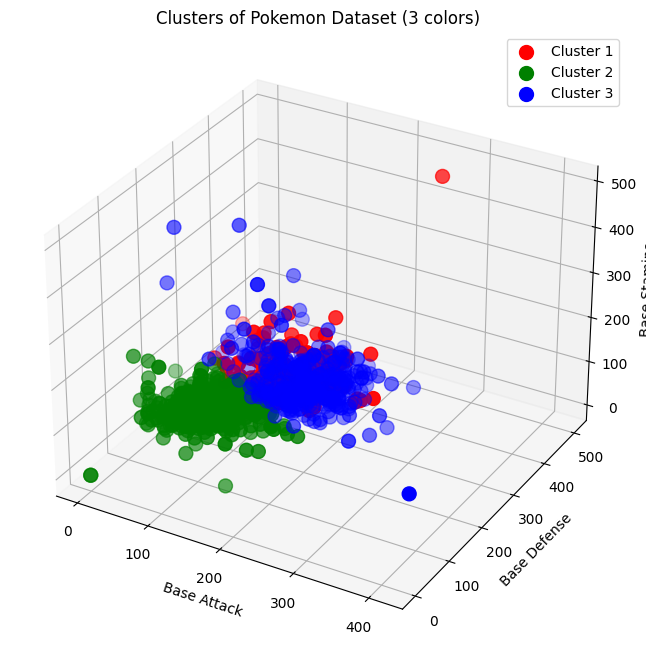

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to Visualize the Clusters
def visualize_clusters(dataset, c_num, colors, name):
    # Crear la figura para 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Visualizando los clusters
    for i in range(0, c_num):
        ax.scatter(dataset['base_attack'][dataset['cluster'] == i],
                   dataset['base_defense'][dataset['cluster'] == i],
                   dataset['base_stamina'][dataset['cluster'] == i],
                   s=100, c=colors[i], label=f'Cluster {i+1}')

    ax.set_title(f'Clusters of {name} Dataset ({c_num} colors)')
    ax.set_xlabel('Base Attack')
    ax.set_ylabel('Base Defense')
    ax.set_zlabel('Base Stamina')
    ax.legend()
    plt.show()

# Llamar a la función para visualizar los clusters
visualize_clusters(df, optimal_k, ['r', 'g', 'b', 'y', 'c', 'm'], 'Pokemon')

In [ ]:
basic1 = pd.read_csv("/content/drive/MyDrive/DataSets/Ejercicios/Practica 2/pokemon.csv")

In [ ]:
basic1.head()

,pokemon_id,pokemon_name,base_attack,base_defense,base_stamina,type,rarity,charged_moves,fast_moves,candy_required,...,base_flee_rate,dodge_probability,max_pokemon_action_frequency,min_pokemon_action_frequency,found_egg,found_evolution,found_wild,found_research,found_raid,found_photobomb
0,1,Bulbasaur,118,111,128,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Seed Bomb', 'Power Whip']","['Vine Whip', 'Tackle']",NaN,...,-1.0,0.15,1.6,0.2,True,False,True,True,True,True
1,2,Ivysaur,151,143,155,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Solar Beam', 'Power Whip']","['Razor Leaf', 'Vine Whip']",25.0,...,-1.0,0.15,1.6,0.2,False,True,True,True,True,True
2,3,Venusaur,198,189,190,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Petal Blizzard', 'Solar Beam']","['Razor Leaf', 'Vine Whip']",100.0,...,-1.0,0.15,1.6,0.2,False,True,True,True,True,True
3,4,Charmander,116,93,118,['Fire'],Standard,"['Flame Charge', 'Flame Burst', 'Flamethrower']","['Ember', 'Scratch']",NaN,...,-1.0,0.15,1.6,0.2,True,False,True,True,True,True
4,5,Charmeleon,158,126,151,['Fire'],Standard,"['Fire Punch', 'Flame Burst', 'Flamethrower']","['Ember', 'Fire Fang']",25.0,...,-1.0,0.15,1.6,0.2,False,True,True,True,True,True


In [ ]:
rarity_counts = df['rarity'].value_counts()
print(rarity_counts)


rarity
Standard       910
Legendary       64
Mythic          22
Ultra beast     11
Name: count, dtype: int64


In [ ]:
unique_clusters = df['cluster'].unique()
print(unique_clusters)


[1 2 0]


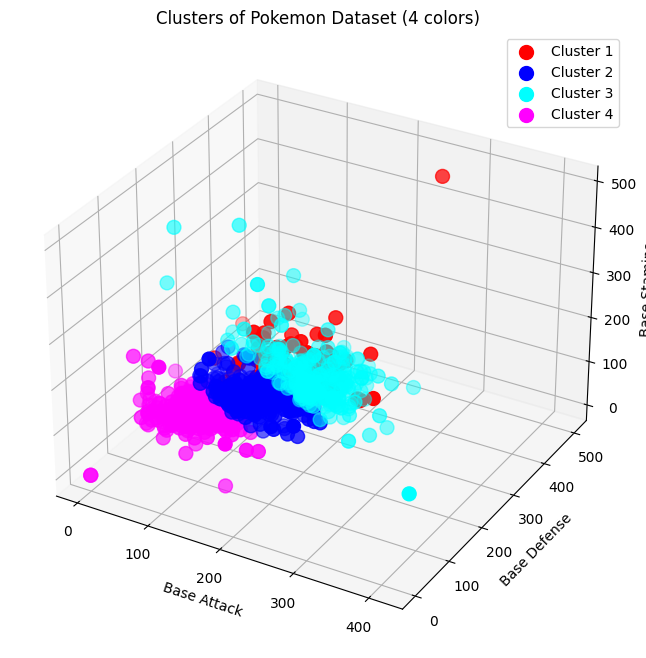

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to Visualize the Clusters
def visualize_clusters(dataset, c_num, colors, name):
    # Crear la figura para 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Visualizando los clusters
    for i in range(0, c_num):
        ax.scatter(dataset['base_attack'][dataset['cluster'] == i],
                   dataset['base_defense'][dataset['cluster'] == i],
                   dataset['base_stamina'][dataset['cluster'] == i],
                   s=100, c=colors[i], label=f'Cluster {i+1}')

    ax.set_title(f'Clusters of {name} Dataset ({c_num} colors)')
    ax.set_xlabel('Base Attack')
    ax.set_ylabel('Base Defense')
    ax.set_zlabel('Base Stamina')
    ax.legend()
    plt.show()

# Visualizar los clusters en basic1
visualize_clusters(basic1, 4, ['red', 'blue', 'cyan', 'magenta'], 'Pokemon')


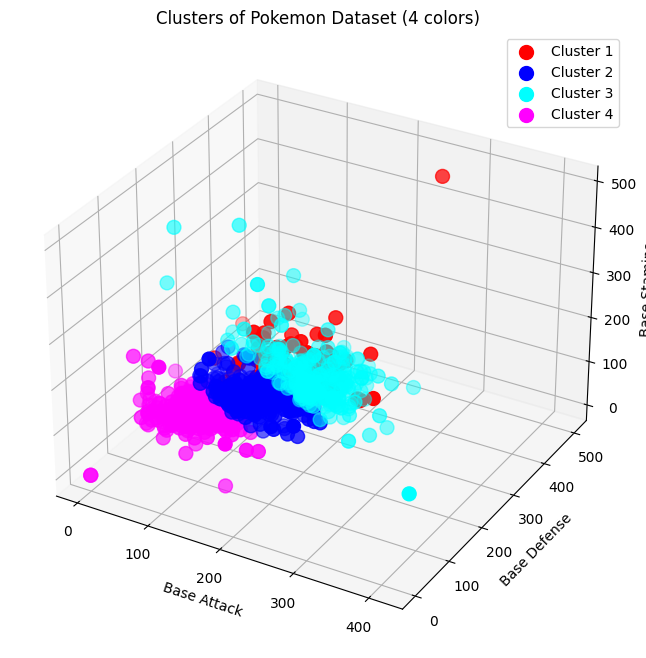

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to Visualize the Clusters
def visualize_clusters(dataset, c_num, colors, name):
    # Crear la figura para 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Visualizando los clusters
    for i in range(0, c_num):
        ax.scatter(dataset['base_attack'][dataset['cluster'] == i],
                   dataset['base_defense'][dataset['cluster'] == i],
                   dataset['base_stamina'][dataset['cluster'] == i],
                   s=100, c=colors[i], label=f'Cluster {i+1}')

    ax.set_title(f'Clusters of {name} Dataset ({c_num} colors)')
    ax.set_xlabel('Base Attack')
    ax.set_ylabel('Base Defense')
    ax.set_zlabel('Base Stamina')
    ax.legend()
    plt.show()

# Visualizar los clusters en basic1 con 4 clusters y colores ['red', 'blue', 'cyan', 'magenta']
visualize_clusters(basic1, 4, ['red', 'blue', 'cyan', 'magenta'], 'Pokemon')


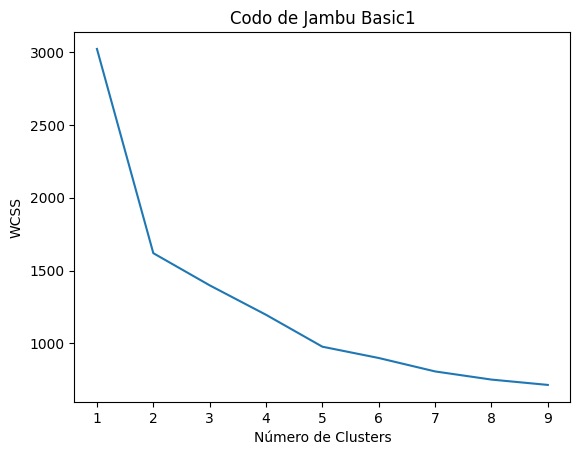

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las columnas numéricas para K-Means
basic1_1 = basic1[['base_attack', 'base_defense', 'base_stamina']].dropna()

# Escalar los datos antes de aplicar K-Means (opcional pero recomendado)
scaler = StandardScaler()
basic1_scaled = scaler.fit_transform(basic1_1)

# Lista para almacenar el WCSS (Within-Cluster Sum of Squares)
wcss = []

# Aplicar K-Means con diferentes números de clusters para calcular el WCSS
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, max_iter=300, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(basic1_scaled)  # Usamos los datos escalados
    wcss.append(kmeans.inertia_)

# Gráfica del Codo de Jambu
plt.plot(range(1, 10), wcss)
plt.title("Codo de Jambu Basic1")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.show()


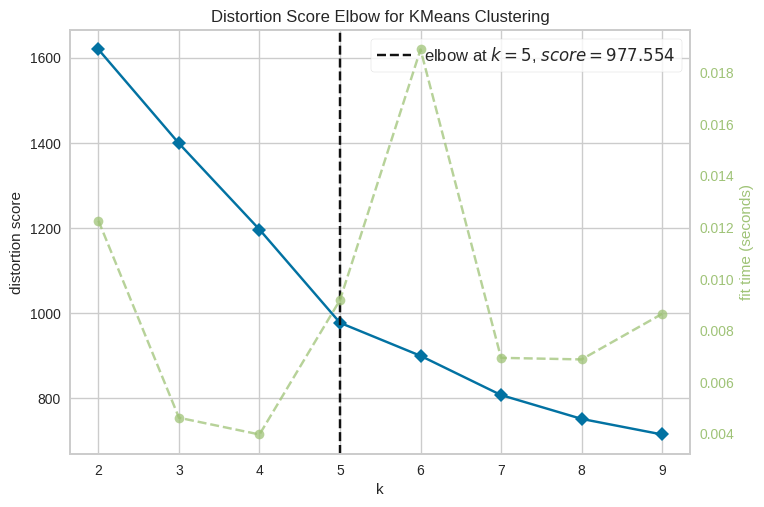

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=42), k=(2, 10))

In [ ]:
from yellowbrick.cluster import kelbow_visualizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Seleccionar las columnas numéricas que deseas usar para K-Means
basic1_1 = basic1[['base_attack', 'base_defense', 'base_stamina']].dropna()

# Escalar los datos numéricos (opcional pero recomendado)
scaler = StandardScaler()
basic1_scaled = scaler.fit_transform(basic1_1)

# Visualizar el Codo de Jambu usando Yellowbrick
kelbow_visualizer(KMeans(random_state=42), basic1_scaled, k=(2, 10))
